<a href="https://colab.research.google.com/github/Dima200206/-2/blob/main/%D0%9B%D0%915_%D0%92%D0%BB%D0%B0%D1%81%D0%B5%D0%BD%D0%BA%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторна робота 5.
Метод ліктя. Кластеризація даних.
Завдання 1.
Завантажити датасет Ірис. Роздрукувати перші 5 рядочків.
Методом ліктя і методом силуєтів визначити оптимальну кількість кластерів.
Візуалізувати кластери.
Зробити висновки.



   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


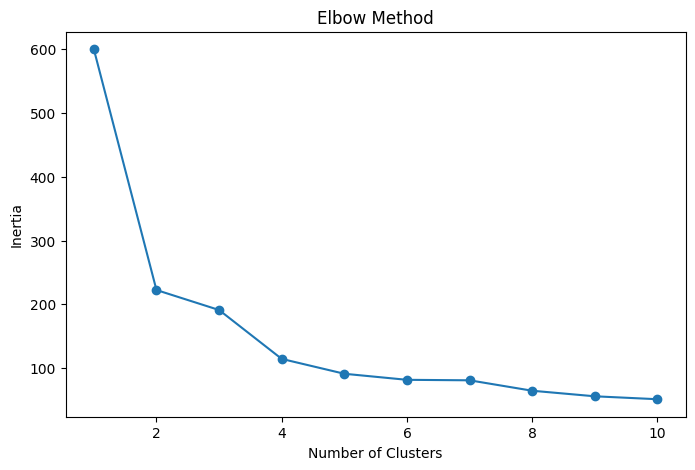

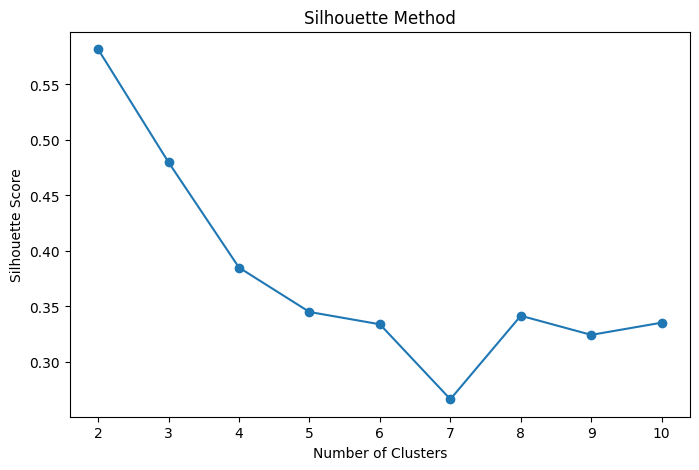

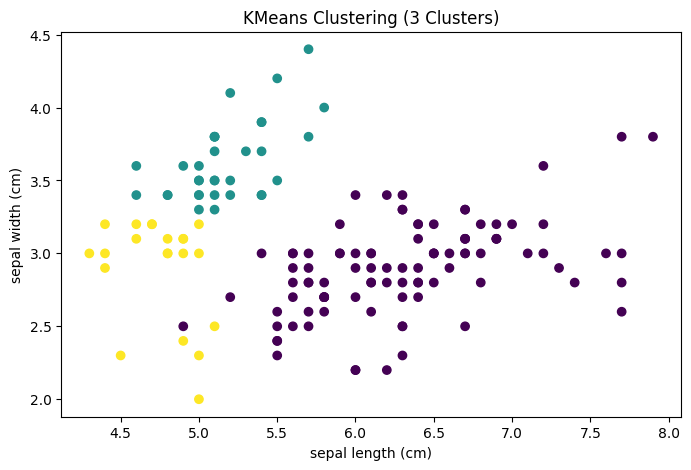

In [23]:
# Task 1: Clustering the Iris dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Print the first 5 rows
print(X.head())

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to find optimal number of clusters
inertia = []
range_clusters = range(1, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method results
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Silhouette Method to find optimal number of clusters
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot Silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Optimal KMeans Clustering based on the results (you can choose k based on Elbow/Silhouette analysis)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
X['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(8, 5))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=X['Cluster'], cmap='viridis')
plt.title('KMeans Clustering (3 Clusters)')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()


Завдання 2.
Завантажити датасет
Реалізувати попередній аналіз даних:
Роздрукувати перші 5 рядків.
Вивести розмір датасета, типи даних.
Перевірити на пропущені значення. При наявності замінити на середнє за
стовпцем.
Перевірити на дублікати. Якщо є – видалити. Вивести описову статистику.
Визначити, яку задачу розв’язуємо (регресія чи класифікація). Побудувати 3
моделі на вибір для визначення оцінки. Підібрати оптимальні параметри.
Оцінити моделі.
Визначити методом ліктя і силуєтів оптимальну кількість кластерів.
Візуалізувати кластери.

In [25]:
# Завантаження необхідних бібліотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Завантаження датасету
# Приклад: df = pd.read_csv('your_dataset.csv')
# Замість 'your_dataset.csv' використайте ваш датасет

# Попередній аналіз даних
print(df.head())
print(f"Розмір датасету: {df.shape}")
print(f"Типи даних:\n{df.dtypes}")

# Перевірка на пропущені значення
print(f"Пропущені значення:\n{df.isnull().sum()}")
df.fillna(df.mean(), inplace=True)

# Перевірка на дублікати
print(f"Кількість дублікатів: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

# Описова статистика
print(df.describe())

# Визначення задачі (регресія чи класифікація)
# Приклад для класифікації
X = df.drop('target', axis=1)  # Замість 'target' використайте вашу цільову змінну
y = df['target']

# Побудова моделей
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Оцінка моделей
for name, model in models.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if name == 'Linear Regression':
        print(f"{name} MSE: {mean_squared_error(y_test, y_pred)}")
    else:
        print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")

# Визначення оптимальної кількості кластерів методом ліктя та методом силуетів
sse = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

# Візуалізація кластерів
optimal_clusters = 3  # Вибір оптимальної кількості кластерів на основі методів
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel(X.columns)
plt.ylabel(X.columns)
plt.title('Clusters Visualization')
plt.show()


NameError: name 'df' is not defined